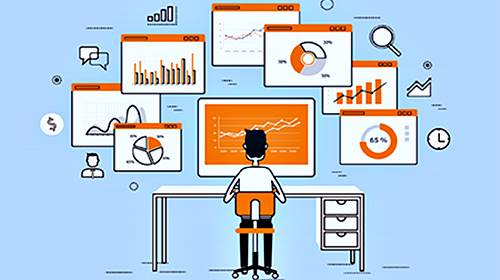

# 📚Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from scipy.stats import mode
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


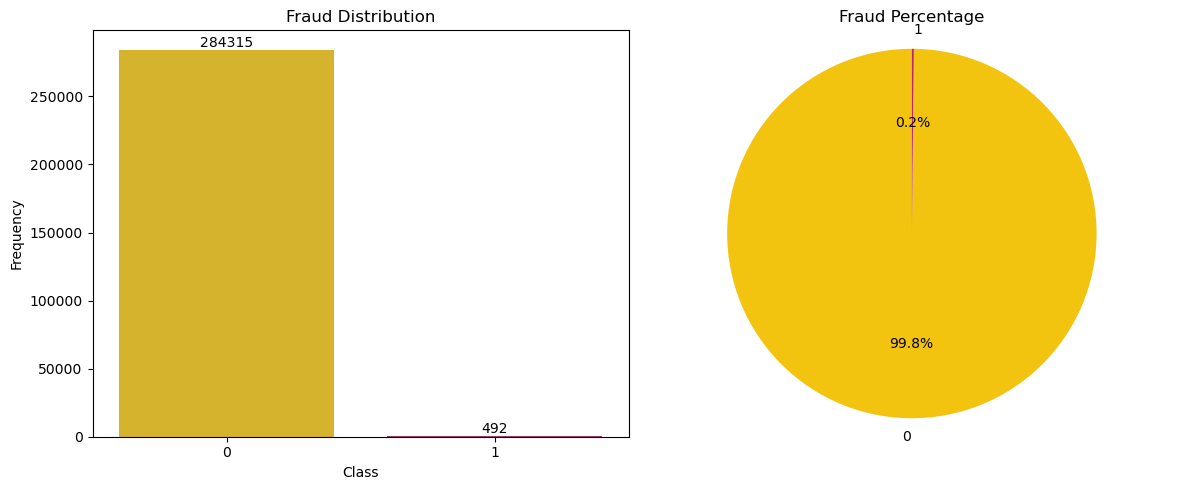

In [7]:
colors = [(0.95, 0.77, 0.06),(0.73, 0.15, 0.49)]
df_fraud = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the bar chart in the first subplot
sns.barplot(data=df_fraud, x="Class", y="Time", palette=colors, ax=ax1)
ax1.bar_label(ax1.containers[0], fontsize=10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Class")
ax1.set_title("Fraud Distribution")

# Calculate percentages for the pie chart
percentages = df_fraud["Time"] / df_fraud["Time"].sum() * 100

# Draw the pie chart in the second subplot
ax2.pie(percentages, labels=df_fraud["Class"], autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')  # Make the pie chart circular
ax2.set_title("Fraud Percentage")

# Adjust the layout to make both plots visible
plt.tight_layout()

# Show the plot
plt.show()


# 3.Data preparation


<img src="https://hablemosdeempresas.com/wp-content/uploads/sites/2/2017/07/big1-1024x630.jpg" alt="Texto alternativo" width="500" height="300" >

In [8]:
df_reduction = pd.DataFrame(index=df.columns[:-1])

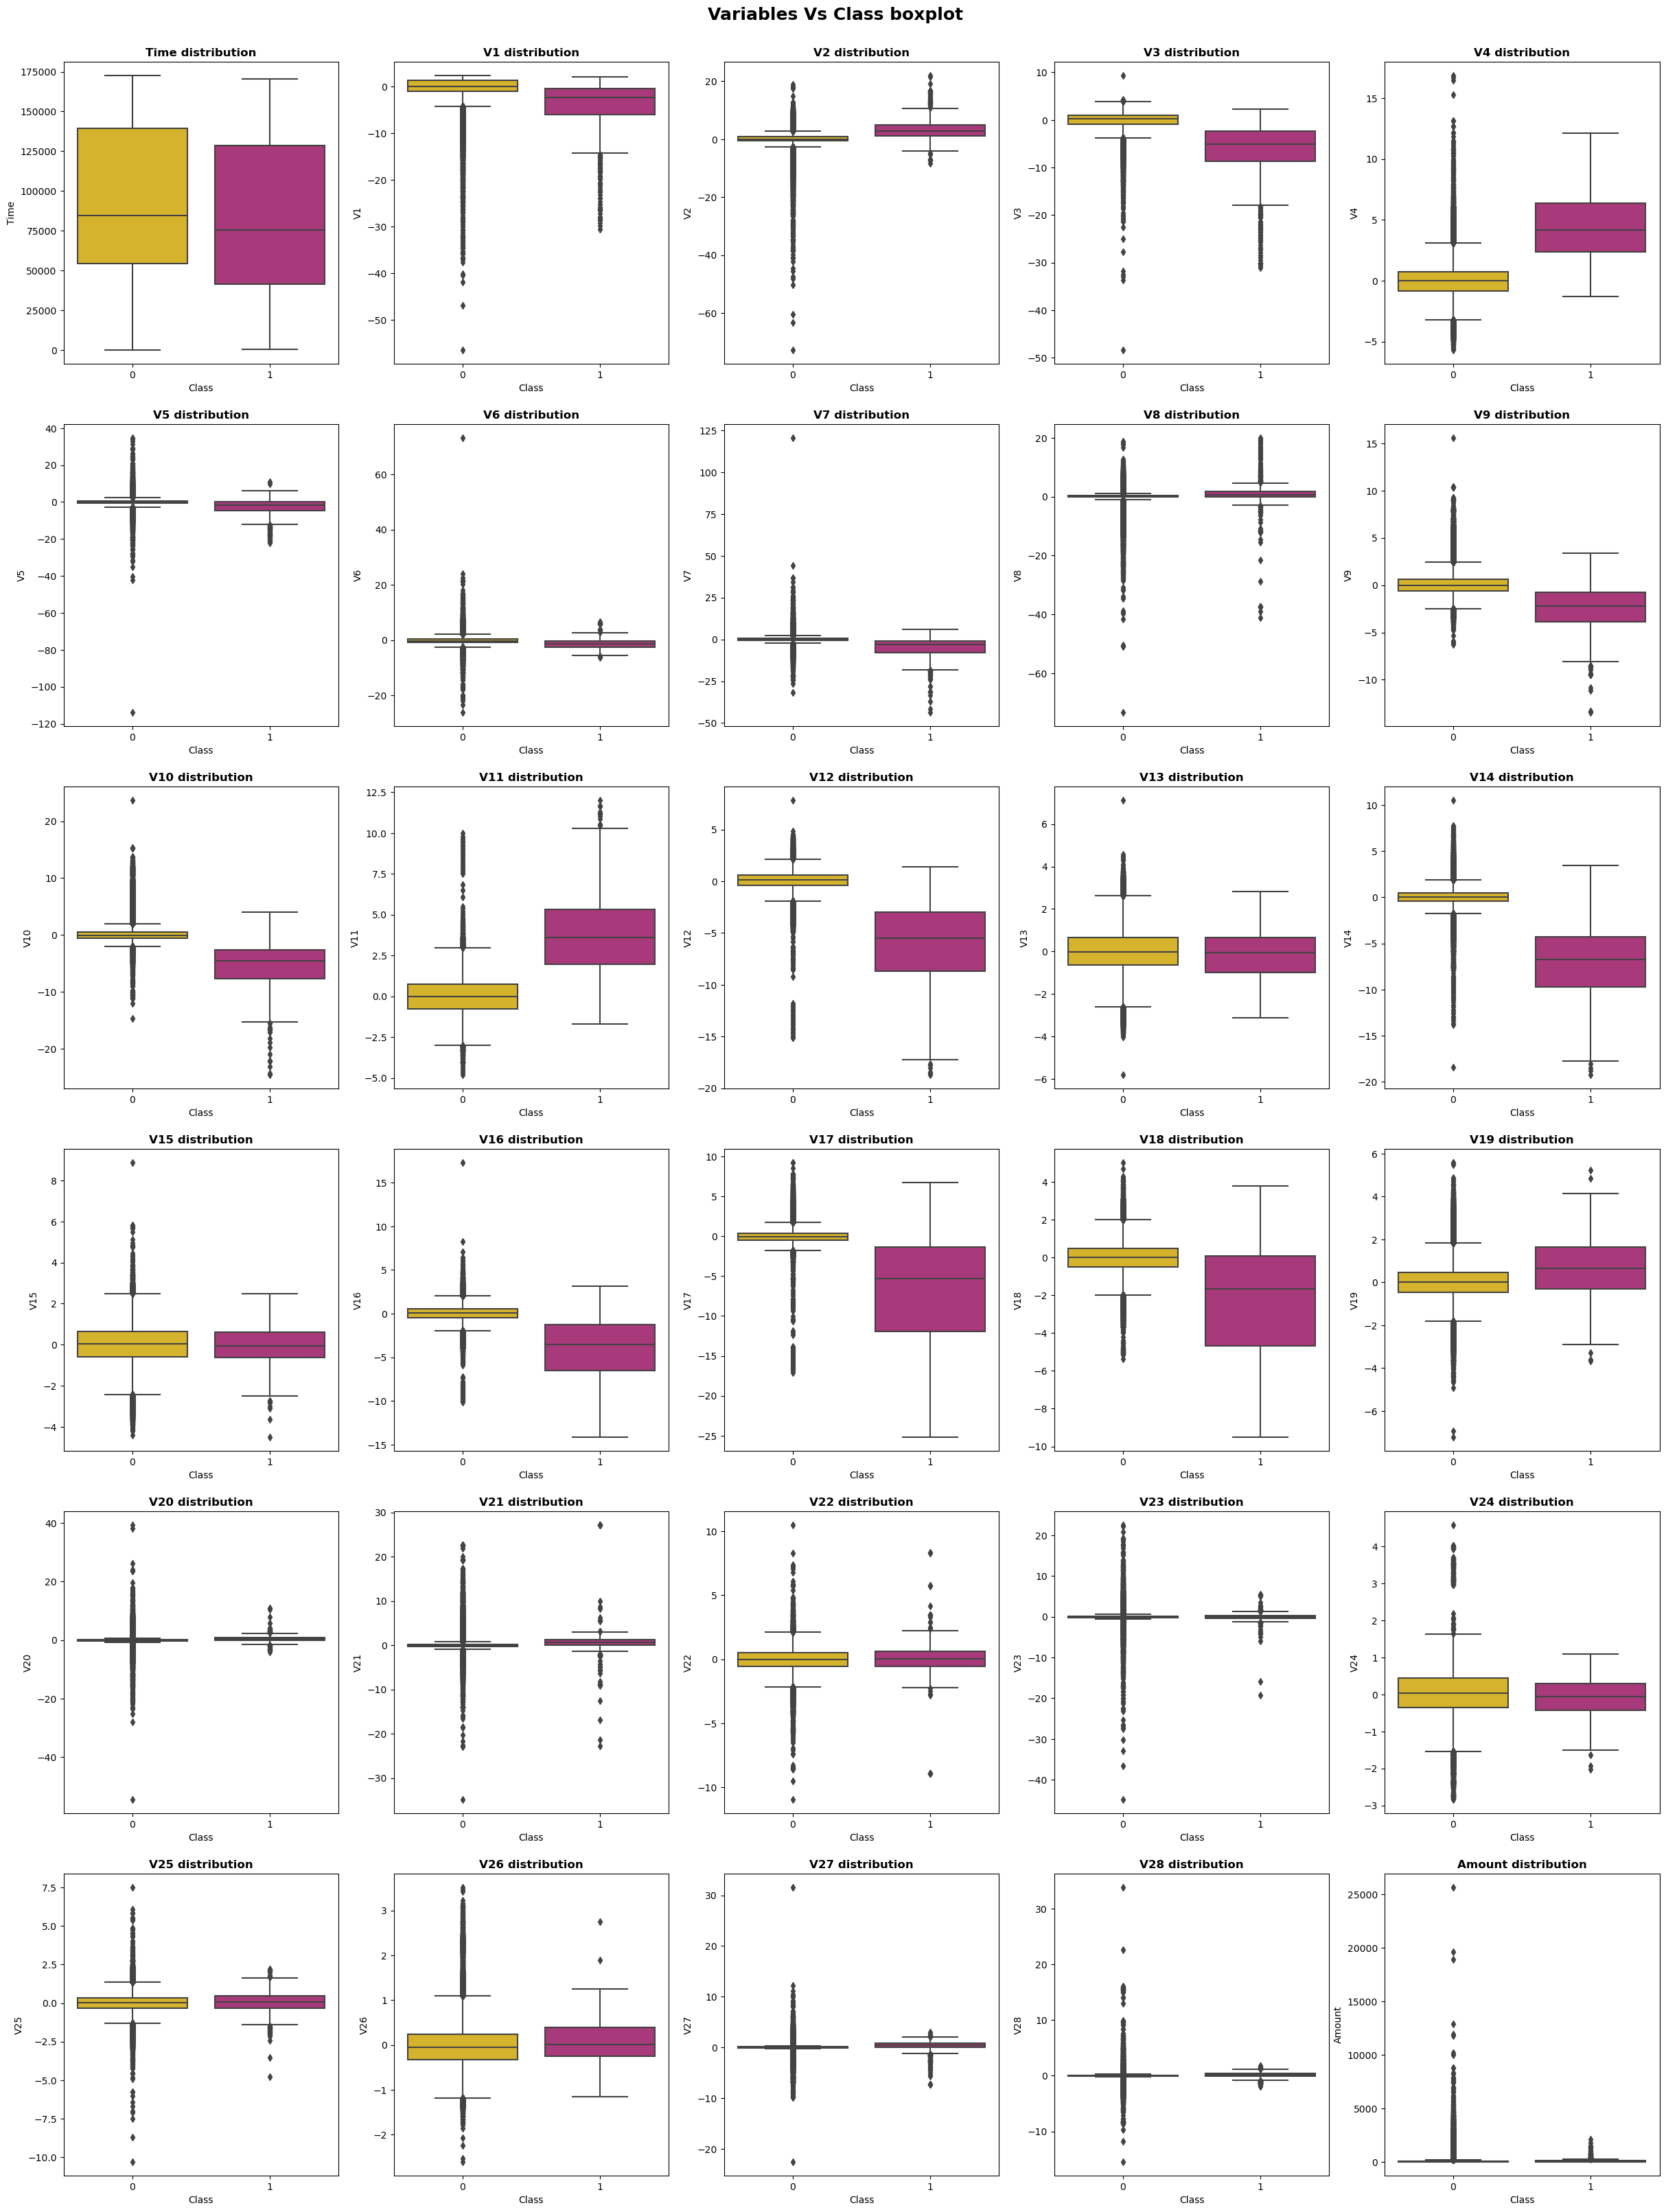

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Variables Vs Class boxplot', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i, palette=colors)
  axes[fila,colum].set_title(f"{i} distribution",fontweight='bold')
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1


In [10]:
df_reduction["Visual"]=[0, 1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0, 1,0, 0, 0, 0, 0, 1,0, 0]

### **Anova**

In [11]:
x = df.drop('Class', axis=1)
y = df['Class']

In [12]:
f_scores = f_classif(x,y)

In [13]:
p_values = f_scores[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduction["Anova"]=significacia
df_reduction


,Visual,Anova
Time,0,1
V1,1,1
V2,1,1
V3,1,1
V4,1,1
V5,1,1
V6,1,1
V7,1,1
V8,1,1
V9,1,1


### **Chi-squared**

In [14]:
columns = df.columns[:-1]

In [15]:
# Create a copy of the DataFrame
df_scale = df.copy()

# Apply Min-Max scaling to specified columns
df_scale[columns] = MinMaxScaler().fit_transform(df_scale[columns])

# Separate features (x) and target variable (y)
x = df_scale.drop('Class', axis=1)
y = df_scale['Class']

# Perform chi-squared test
chi_squared = chi2(x, y)

# Extract p-values from the chi-squared test results
p_values = chi_squared[1]

# Set the significance level and create a list to store significance results
alpha = 0.05
significance = []

# Determine significance for each p-value
for i in range(len(p_values)):
    p = p_values[i]
    if p < alpha:
        significance.append(1)
    else:
        significance.append(0)

# Add the Chi-squared test results to the DataFrame for reduction
df_reduction["Chi2"] = significance


In [16]:
df_reduction

,Visual,Anova,Chi2
Time,0,1,1
V1,1,1,0
V2,1,1,0
V3,1,1,1
V4,1,1,1
V5,1,1,0
V6,1,1,0
V7,1,1,0
V8,1,1,0
V9,1,1,1


In [17]:
df_reduction["Selection"]= df_reduction['Anova']+df_reduction['Chi2']+df_reduction['Visual']

In [18]:
df_reduction

,Visual,Anova,Chi2,Selection
Time,0,1,1,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [19]:
columns_final = list(df_reduction[df_reduction["Selection"]>=2].index.values)
columns_final = columns_final + ["Class"]

In [20]:
columns_final

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V21',
 'V27',
 'Class']

In [21]:
df = df[columns_final]

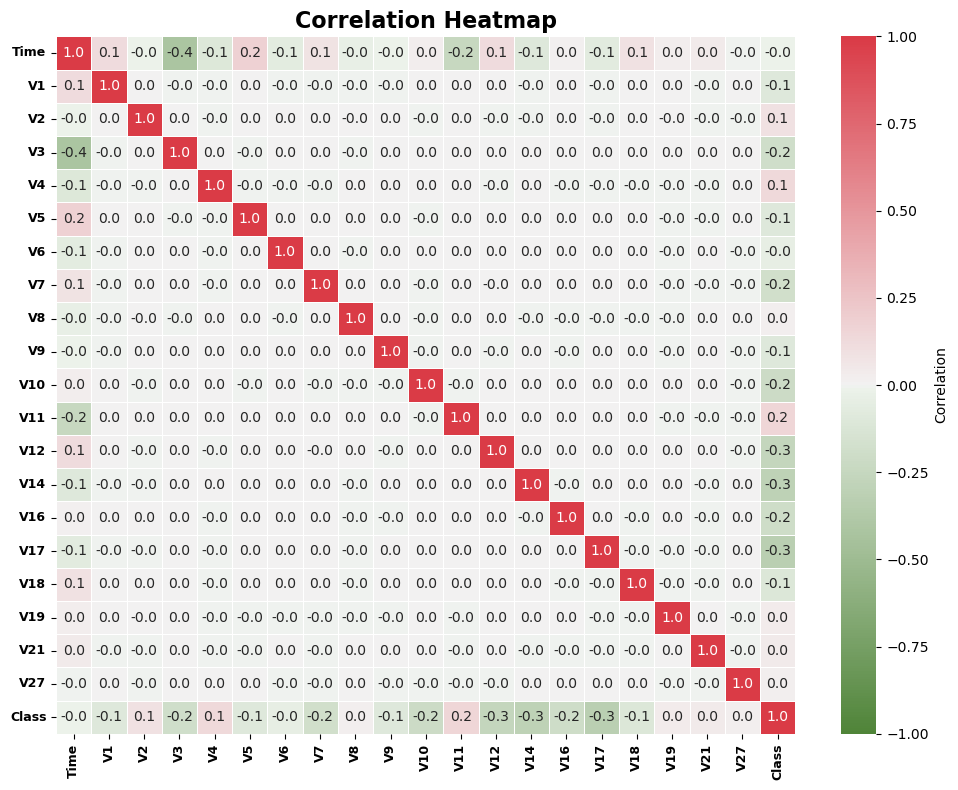

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with seaborn
plt.figure(figsize=(10, 8))
cmap_custom = sns.diverging_palette(120, 10, as_cmap=True)

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap=cmap_custom, fmt='.1f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})

# Add a title
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Adjust the font size of the axis labels
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

# Adjust the spacing between the labels and the heatmap
plt.tight_layout()

# Show the heatmap
plt.show()


###***Stratified sampling***

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, df["Class"], test_size=0.2, stratify=df["Class"], random_state=42)

In [24]:
X_test.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V21,V27,Class
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,-0.857785,-0.229961,0.266371,-0.741398,-0.605617,-0.392568,-0.162648,0.080084,0.533837,0
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,1.850842,-1.549779,0.963974,-0.147319,-0.209328,1.058898,0.397057,-0.295555,0.110802,0


In [25]:
X_train.groupby("Class")["Time"].count()/X_train.groupby("Class")["Time"].count().sum()

Class
0    0.998271
1    0.001729
Name: Time, dtype: float64

In [26]:
X_test.groupby("Class")["Time"].count()/X_test.groupby("Class")["Time"].count().sum()

Class
0    0.99828
1    0.00172
Name: Time, dtype: float64

###**Undersampling**

In [27]:
N_SAMPLES = 200
RATIO = 0.30
subsamples = []

for i in tqdm(range(N_SAMPLES)):
    random_undersampler = RandomUnderSampler(sampling_strategy=RATIO)
    X_resampled, y_resampled = random_undersampler.fit_resample(X_train, y_train)
    subsamples.append(X_resampled)


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:14<00:00, 14.27it/s]


##**📚Import libraries for modeling**

In [28]:
#Algorimos de clasificación

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [29]:
# Initialize a dictionary to store results
results = {}

# Extract feature columns and target variable column
x_cols = columns_final[:-1]
y_col = columns_final[-1]


## 🤖**Algorithms**

###**🏘️K-NN**

In [30]:
# Initialize lists to store performance metrics
auc_list = []
pr_list = []
f1_list = []

# Iterate over subsets (subsample) and perform KNN classification
for sub in tqdm(subsamples):
    knn = KNeighborsClassifier()
    knn.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = knn.predict_proba(X_test[x_cols])[:, 1]
    y_pred = knn.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

# Calculate average metrics over subsets
avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

# Store the results in the dictionary
results["KNN"] = [avg_roc_auc, avg_pr_auc, avg_f1]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [07:15<00:00,  2.18s/it]


###**🎲Naive Bayes-Bernoulli**

In [31]:
auc_list = []
pr_list = []
f1_list = []

for sub in tqdm(subsamples):
    model = BernoulliNB()
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

results["NaiveBayes"] = [avg_roc_auc, avg_pr_auc, avg_f1]
print(results)


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:30<00:00,  6.60it/s]

{'KNN': [73.8, 7.0, 1.5], 'NaiveBayes': [95.8, 64.9, 44.0]}


###**🌳Decision tree**

In [32]:
# Initialize lists to store performance metrics
auc_list = []
pr_list = []
f1_list = []

# Iterate over subsets (submuestras) and train a Decision Tree classifier
for sub in tqdm(subsamples):
    model = DecisionTreeClassifier()
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

# Calculate average metrics over subsets
avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

# Store the results in the dictionary
results["DecisionTree"] = [avg_roc_auc, avg_pr_auc, avg_f1]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.13it/s]


### **🌳🌳Random forests**🌳🌳


In [33]:
# Initialize lists to store performance metrics
auc_list = []
pr_list = []
f1_list = []

# Iterate over subsets (submuestras) and train a Random Forest classifier
for sub in tqdm(subsamples):
    model = RandomForestClassifier()
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

# Calculate average metrics over subsets
avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

# Store the results in the dictionary
results["RandomForest"] = [avg_roc_auc, avg_pr_auc, avg_f1]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [06:15<00:00,  1.88s/it]


###**📈Logistic regression📉**

In [34]:
# Initialize lists to store performance metrics
auc_list = []
pr_list = []
f1_list = []

# Iterate over subsets (submuestras) and train a Logistic Regression model
for sub in tqdm(subsamples):
    model = LogisticRegression()
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

# Calculate average metrics over subsets
avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

# Store the results in the dictionary
results["LogisticRegression"] = [avg_roc_auc, avg_pr_auc, avg_f1]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.62it/s]


###**🧠Neural networks**

In [35]:
# Initialize lists to store performance metrics
auc_list = []
pr_list = []
f1_list = []

# Iterate over subsets (submuestras) and train an MLP (Multi-Layer Perceptron) classifier
for sub in tqdm(subsamples):
    model = MLPClassifier()
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)

# Calculate average metrics over subsets
avg_roc_auc = round(np.mean(auc_list) * 100, 1)
avg_pr_auc = round(np.mean(pr_list) * 100, 1)
avg_f1 = round(np.mean(f1_list) * 100, 1)

# Store the results in the dictionary
results["NeuralNetworks"] = [avg_roc_auc, avg_pr_auc, avg_f1]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:04<00:00,  3.12it/s]


##**Result metrics algorithms**

In [36]:
df_metricas = pd.DataFrame(results, index=['RocAuc', 'PrAuc', 'F1']).T
df_metricas

,RocAuc,PrAuc,F1
KNN,73.8,7.0,1.5
NaiveBayes,95.8,64.9,44.0
DecisionTree,92.9,46.8,7.1
RandomForest,97.4,78.5,34.7
LogisticRegression,96.8,69.1,15.2
NeuralNetworks,77.5,33.1,17.4


##**🏆Optimization of the best model**

In [37]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be in a leaf node
}

# Initialize lists to store performance metrics and best hyperparameters
auc_list = []
pr_list = []
f1_list = []
n_estimators_list = []
max_depth_list = []
min_samples_split_list = []
min_samples_leaf_list = []

# Iterate over subsets (submuestras) for the first 20 subsets
for sub in tqdm(subsamples[:20]):
    # Define the RandomForest classifier
    rf_classifier = RandomForestClassifier()
    # Use GridSearchCV to search over specified hyperparameters
    model = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='average_precision', cv=2)
    model.fit(sub[x_cols], sub[y_col])

    # Prediction
    y_scores = model.predict_proba(X_test[x_cols])[:, 1]
    y_pred = model.predict(X_test[x_cols])

    # Calculate AUC-ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Make predictions and calculate F1 Score
    f1 = f1_score(y_test, y_pred)

    # Append metrics to respective lists
    auc_list.append(roc_auc)
    pr_list.append(pr_auc)
    f1_list.append(f1)
    n_estimators_list.append(model.best_params_["n_estimators"])
    max_depth_list.append(model.best_params_["max_depth"])
    min_samples_split_list.append(model.best_params_["min_samples_split"])
    min_samples_leaf_list.append(model.best_params_["min_samples_leaf"])


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [35:28<00:00, 106.44s/it]


In [38]:
max_depth_list = [-1 if i is None else i for i in max_depth_list]
roc_auc = round(np.mean(auc_list)*100,1)
pr_auc = round(np.mean(pr_list)*100,1)
f1 = round(np.mean(f1_list)*100,1)
n_estimators=mode(n_estimators_list)
max_depth = mode(max_depth_list)
min_samples_split=mode(min_samples_split_list)
min_samples_leaf=mode(min_samples_leaf_list)

### **Selection of hyperparameters and final metrics

In [39]:
print(f"""The ROC-AUC for this method is: {roc_auc} \n
PR-AUC is: {pr_auc} \n
F1 Score is: {f1} \n
Next, the best parameters will be displayed: \n
n_estimators: {n_estimators.mode} \n
max_depth: {max_depth.mode} \n
min_samples_split: {min_samples_split.mode}\n
min_samples_leaf: {min_samples_leaf.mode}\n """)


The ROC-AUC for this method is: 97.5 

PR-AUC is: 77.3 

F1 Score is: 34.1 

Next, the best parameters will be displayed: 

n_estimators: [200] 

max_depth: [20] 

min_samples_split: [2]

min_samples_leaf: [2]
 


In [40]:
# ... (previous code)

# Iterate over subsets (subsamples) for the first 20 subsets
for sub in tqdm(subsamples[:20]):
    # Define the RandomForest classifier
    rf_classifier = RandomForestClassifier()

    # Use GridSearchCV to search over specified hyperparameters
    model = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='average_precision', cv=2)
    model.fit(sub[x_cols], sub[y_col])  # Update to include y_cols

    # Get the best hyperparameters
    best_params = model.best_params_

    # Extract individual values for max_depth
    best_max_depth = best_params["max_depth"]

    # Check if best_max_depth is an array and get the first element
    if isinstance(best_max_depth, list):
        best_max_depth = best_max_depth[0]

    # Set the best hyperparameters for the classifier
    rf_classifier.set_params(**best_params)

    # ... (rest of the code remains the same)


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:26:08<00:00, 258.42s/it]


#<font color=#29ba61>**✅ 5. EVALUACIÓN**</font>


In [45]:
# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier()

# Use GridSearchCV to search over specified hyperparameters
model = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='average_precision', cv=2)

# Iterate over subsets (submuestras) for the first 20 subsets
for sub in tqdm(subsamples[:20]):
    model.fit(sub[x_cols], sub[y_col])  # Update to include y_cols

# Get the best hyperparameters
best_params = model.best_params_

# Initialize a new RandomForest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the best classifier on the entire training data
best_rf_classifier.fit(X_train[x_cols], y_train)

# Prediction
y_scores = best_rf_classifier.predict_proba(X_test[x_cols])[:, 1]
y_pred = best_rf_classifier.predict(X_test[x_cols])


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [36:58<00:00, 110.90s/it]


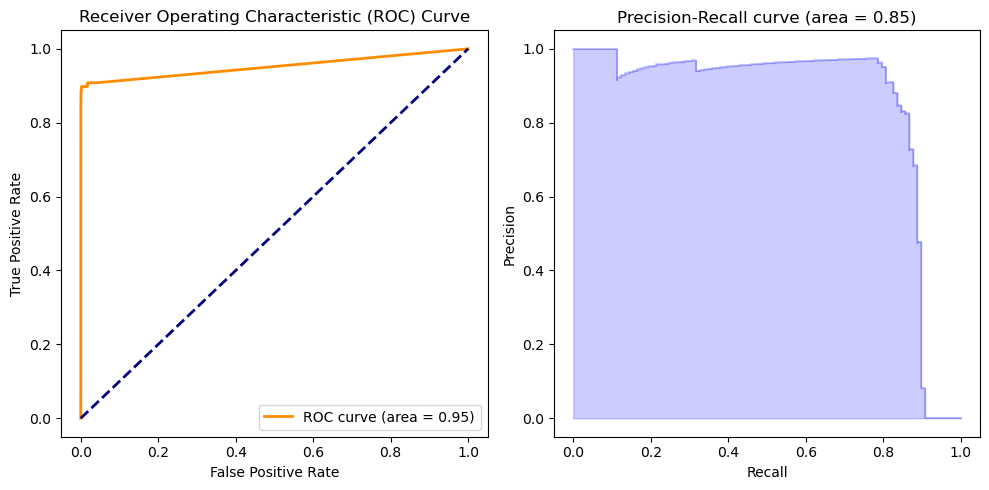

In [46]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (area = {0:0.2f})'.format(average_precision))

plt.tight_layout()
plt.show()
